In [ ]:
# 5.2 합성곱 신경망 맛보기

# 테스트를 위한 데이터
# fashion_mnist 데이터셋, 운동화, 셔츠, 샌들 같은 작은 이미지로 구성된 데이터
# 기본 MNIST 데이터셋처럼 열 가지 분류될 수 있는 28x28 픽셀의 이미지 7만 개로 구성되어 있음.
# 데이터셋은 훈련 데이터는 0~255 사이의 값을 가지는 28x28 크기의 넘파일 배열.
# 레이블(정답) 데이터는 0 ~ 9까지 정수 값을 갖는 배열
# 0: T-shirt, 1: Trouser, 2: Pullover, 3: Dress, 4: Coat, 5: Sandal, 6: Shirt, 7: Sneaker, 8: Bag, 
# 9: Ankel boot

In [1]:
# 라이브러리
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [56]:
# 데이터 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
# 훈련 및 레이블 데이터 만들기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

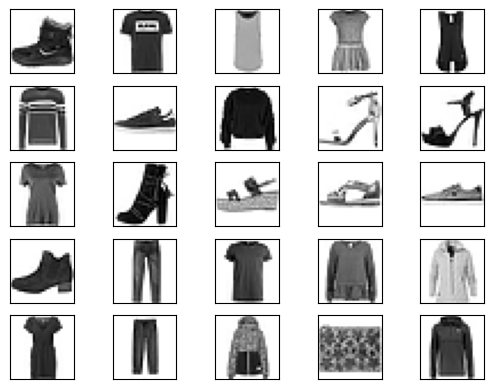

In [26]:
# 분류에 사용할 클래스 정의
# T-shirt ~ Ankle boot'
class_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 
              'Shirt', 'Sneaker', 'Bag','Ankel boot']

for i in range(25):
    plt.subplot(5, 5, i+1)   
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
# 합성곱 신경망과 심층신경망을 비교... 
# 심층신경망을 이용하여 네트워크를 구성... 

# 데이터 전처리... 
X_train, X_test = X_train/255.0, X_test/255.0  # 이미지 데이터를 255로 나눔. 

# 모델 생성
# Sequential 객체의 add 메서드 대신에 생성자 객체에 매개변수 값으로 레이어를 전달... 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),      # 입력 데이터 크기
    tf.keras.layers.Dense(128, activation='relu'),    # 은닉층 : 128개 노드(뉴런), activation='relu'
    tf.keras.layers.Dropout(0.2),                     # 과적합 문제를 방지하기 위해서 특정 노트를 0으로... 20% 노드를 무작위로 0으로
    tf.keras.layers.Dense(10, activation='softmax')   # 출력층 노는 10개, 활성화 함수 softmax
])


In [48]:
# 모델 컴파일 
model.compile(
    optimizer='adam',   # 하이퍼 파라미터 들... 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

----

In [29]:
# 이미지 데이터를 255로 나눈 이유.... 
# scikit_image 패키지 설치
!pip install scikit_image

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 409.6 kB/s eta 0:00:31
   - -------------------------------------- 0.5/12.9 MB 409.6 kB/s eta 0:00:31
   - -------------------------------------- 0.5/12.9 MB 409.6 kB/s eta 0:00:31
   - -------------------------------------- 0.5/12.9 MB 409.6 kB/s eta 0:00:31
   - -------------------------------------- 0.5/12.9 MB 409.6 kB/s eta 0:00:31
   - -------------------------------------- 0.5/12.9 MB 409.6 kB/s eta 0:00:31
   - -------------------------------------- 0.5/12.9 MB 409.6 kB/s eta 0:00:31
   - -------------------------------------- 0.5/12.9 MB 409.6 kB/s eta 0:00:31
   - -------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
# 사용할 라이브러리
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt


In [31]:
# 이미지 요약 정보를 표시하도록 함수를 구현... (이미지형태 및 벡터 값 범위 정보 출력)
def print_image_summary(image, labels):
    print('--------------')
    print('Image Details:')
    print(f'Image dimensions : {image.shape}')
    print('Channels : ')
    
    if len(labels) == 1:
        image = image[..., np.newaxis]
    
    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min ={min_val:.4f}, max={max_val:.4f}')    

C:\Users\Admin\AppData\Local\Temp\ipykernel_3328\4059937868.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(image_gs, ax=ax)


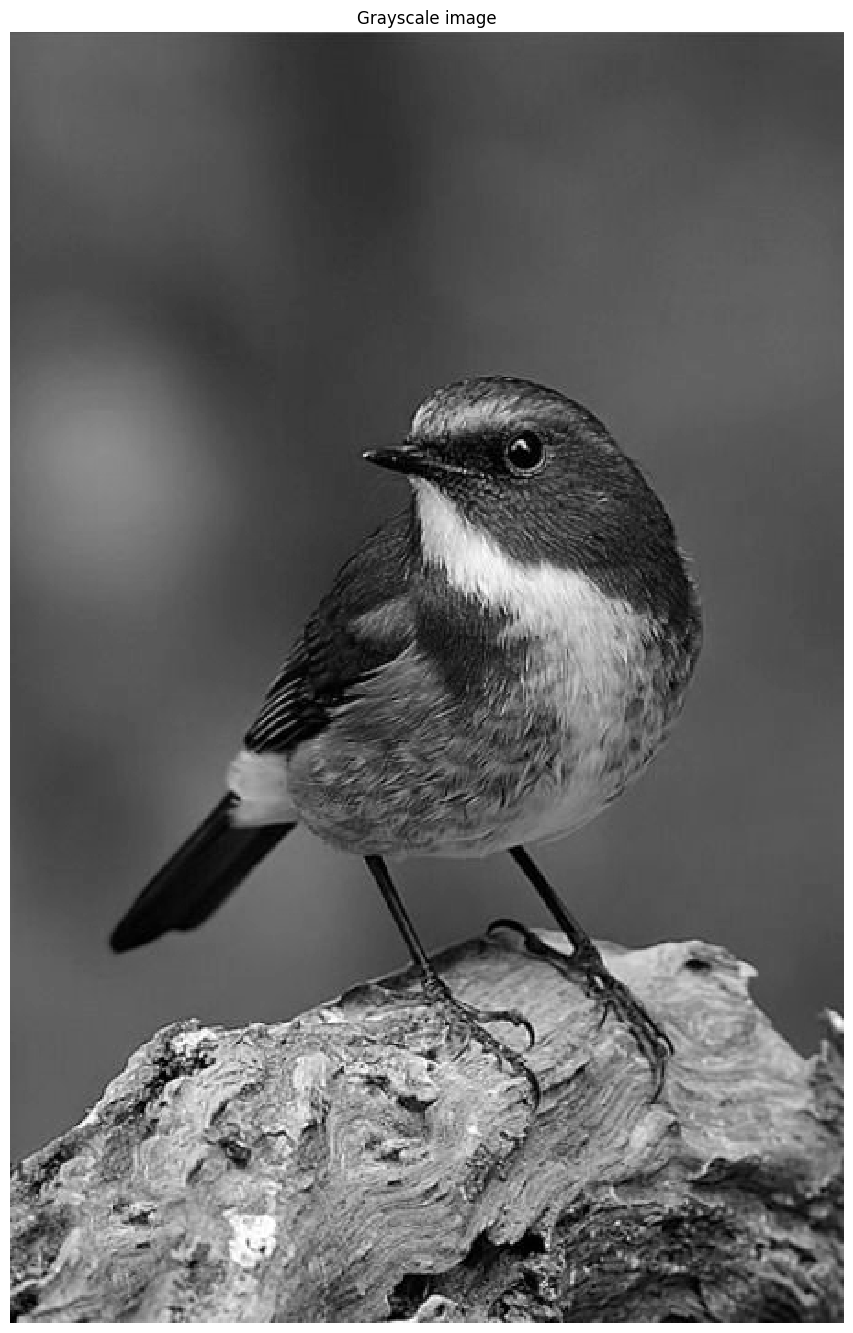

In [45]:
image_gs = imread('./data/bird.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(9,16))
imshow(image_gs, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off')
plt.show()

In [46]:
print_image_summary(image_gs, ['G'])

--------------
Image Details:
Image dimensions : (703, 454)
Channels : 
G : min =0.0000, max=1.0000


---

In [49]:
## 모델 훈련 및 평가
model.fit(X_train, y_train, epochs=5)      # 훈련 데이터셋을 이용한 모델 훈련
model.evaluate(X_test, y_test, verbose=2)  # 검증 데이터셋을 이용하여 모델 평가

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5346 - loss: 1.5297
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7415 - loss: 0.7163
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7755 - loss: 0.6192
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7973 - loss: 0.5630
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8117 - loss: 0.5308
313/313 - 1s - 2ms/step - accuracy: 0.8152 - loss: 0.5102


[0.5102213621139526, 0.8151999711990356]

In [61]:
# 데이터 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
# 훈련 및 레이블 데이터 만들기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [62]:
## 합성곱을 이용한 방식
# 훈련 데이터 및 검증 데이터에 대해서 255. 로 나눔 처리... 
X_train_final = X_train.reshape((-1, 28, 28, 1))/255.
X_test_final = X_test.reshape((-1, 28, 28, 1))/255.

In [63]:
# 합성곱 네트워크를 이용한 모델 생성
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')   
])

In [64]:
# 합성곱 네트워크 모델 컴파일
model_with_conv.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [65]:
# 합성곱 네트워크 모델 학습 및 평가
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final, y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8013 - loss: 0.5575
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8993 - loss: 0.2724
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9206 - loss: 0.2178
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9297 - loss: 0.1902
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9418 - loss: 0.1576
313/313 - 1s - 3ms/step - accuracy: 0.9150 - loss: 0.2480


[0.2480323314666748, 0.9150000214576721]

In [69]:
model_with_conv.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,264,928 (4.83 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 843,286 (3.22 MB)

In [ ]:
## 5.3 전이 학습
# ImageNet 데이터에 대해 가중치가 선행 학습된 ResNet50 모델을 사용

In [1]:
# 라이브러리 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [35]:
# 모델 생성... ResNet50 사전 훈련된 모델을 불러움
model = ResNet50(include_top=True,      # 네트워크 상단에 완전연결층 포함 여부
                 weights="imagenet",    # 가중치를 의미. imagenet은 사전 훈련값. None은 무작위 초기화
                 input_tensor=None,     # 입력 데이터의 텐서(layers.input())
                 input_shape=None,      # 입력 이미지에 대한 텐서 크기
                 pooling=None,          # 풀링에서 사용할 수 있는 값은 'None','avg','max' 로 추가여부    
                 classes=1000)          # weights로 'imagenet'을 사용하려면, classes 값이 1000이어야함. 

In [36]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [37]:
# 앞서 만든 model(ResNet50으로 사전학습된)
# 밀집충을 추가
model.trainable = False   # 고정 - 학습시 훈련값에 영향을 받지 않기 위해서... 
model = Sequential([model, 
                    Dense(2, activation='sigmoid')]
                   )
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1000)           │    25,636,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         2,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,638,714 (97.80 MB)

 Trainable params: 2,002 (7.82 KB)

 Non-trainable params: 25,636,712 (97.80 MB)

In [38]:
# 모델 컴파일 - 모델을 효과적으로 구현할 수 있는 환경 설정을 진행... 
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# catanddog : 캐글에서 제공하는 개와 고양이 이미지... 
# 나중에....  ImageDataGenerator 클래스의 사용... flow_from_directory -> 디렉터리 구조의 데이터 구조를 가져옴

In [2]:
# 전처리 및 학습을 위한 변수 선언
BATCH_SIZE = 32
image_height = 224  # ResNet50에 Input Layer 값을 참조
image_width = 224
train_dir = './data/catanddog/train/'
valid_dir = './data/catanddog/validation/'


In [41]:
# 이미지 훈련 데이터 전처리 작업(ImageDataGenerator)
#1. 전처리 작업 객체 생성
train = ImageDataGenerator(
    rescale=1./255,         # 원본 영상을 RGB계수로 0~255값으로 구성됨. 1./255 스케일해서 0~1의 범위 변환
    rotation_range=10,      # 이미지 회전 범위. 10은 0 ~ 10도 범위내에 원본 이미지 회전
    width_shift_range=0.1,  # 그림을 수평으로 랜덤하게 평행이동. 넓이의 10% 내외로 이동
    height_shift_range=0.1, # 그림을 수직으로 랜덤하게 평행이동. 높이의 10% 내외로 이동
    shear_range=0.1,        # 원본 이미지를 임의로 변형. 라디안의 0.1 내외로 이미지 변환
    zoom_range=0.1          # 원본 이미지를 임의 확대/축소. 10% 내외로 확대 축소 변환
)

#2. 훈련 데이터 생성
train_generator = train.flow_from_directory(
    train_dir,                                  # 훈련 데이터 경로
    target_size=(image_height, image_width),    # 이미지 크기, 모든 이미지를 자동 조정
    color_mode='rgb',                           # 이미지 색상 모드. 'grayscale', 'rgb'
    batch_size=BATCH_SIZE,                      # 배치당 generator에서 생성한 이미지 개수
    seed=1,                                     # 이미지 임의로 섞기 위한 랜덤한 정수
    shuffle=True,                               # 이미지 섞어서 사용할 경우 True, False면 안 섞음.
    class_mode="categorical"                    # 예측가능한 클래스가 2개면 'binary', 그렇지 않으면 'categorical'
)

#검증 데이터 객체 생성
valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(
    valid_dir,
    target_size=(image_height, image_width),    
    color_mode='rgb',                          
    batch_size=BATCH_SIZE,                      
    seed=7,                                     
    shuffle=True,                               
    class_mode="categorical" 
)

# 훈련 실행
history = model.fit(train_generator, epochs=10, validation_data=valid_generator, verbose=2)

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/10
13/13 - 16s - 1s/step - accuracy: 0.5273 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
13/13 - 16s - 1s/step - accuracy: 0.5273 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
13/13 - 15s - 1s/step - accuracy: 0.5273 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
13/13 - 16s - 1s/step - accuracy: 0.5273 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
13/13 - 15s - 1s/step - accuracy: 0.5273 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
13/13 - 15s - 1s/step - accuracy: 0.5273 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
13/13 - 15s - 1s/step - accuracy: 0.5273 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
13/13 - 16s - 1s/step - accuracy: 0.5273 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 9/10
13/13 - 15s - 1s/step - accuracy: 0.

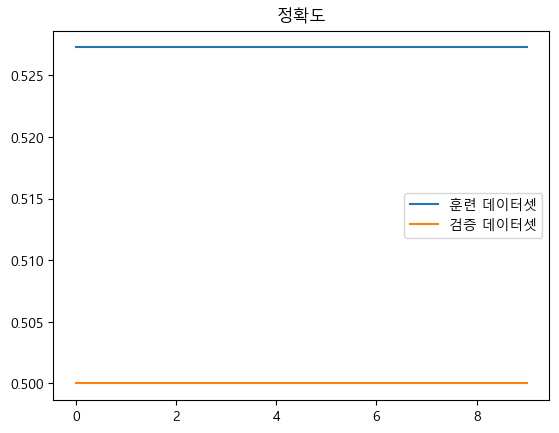

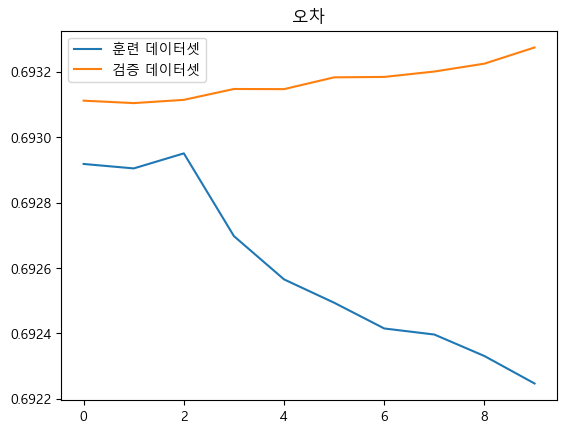

<Figure size 640x480 with 0 Axes>

In [42]:
# matplotlib에는 한글 인코딩 값이 X, 한글 깨짐 현상... 
import matplotlib as mpl
import matplotlib.pylab as plt
# 한글 폰트 지정을 객체
from matplotlib import font_manager

font_fname = 'c:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()  # 폰트 패밀리 값 알아오기... 
plt.rcParams["font.family"] = font_family    # plt에 폰트 설정

# 모델 정확도 그래프 그리기
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))  

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title("오차")
plt.figure()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


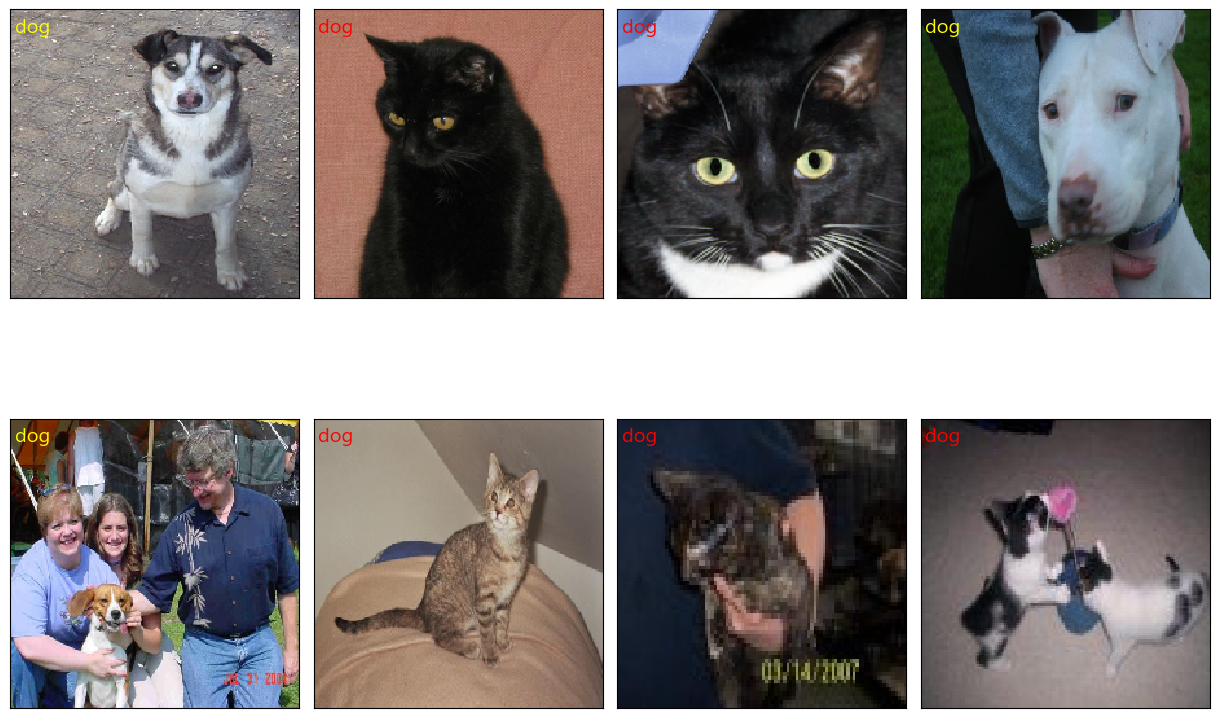

In [43]:
class_names = ['cat','dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)


## 텐서플로 허브 이용하기
---

In [37]:
# 라이브러리 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [70]:
# 텐서플로 허브 사용!
# 텐서플로 허브를 사용하기 위해서 설치 : tensorflow_hub
# 텐서플로 허브는 일반화된 문제들에 대해 모델의 재사용성을 극대화하려고, 구글에서 공개한 API
# 텐서플로 허브는 모델에서 재사용 가능한 부분을 게시, 검색, 사용하기 위한 API를 제공.
# 텐서플로 허브 설치
%pip install tensorflow_hub


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl (390.3 MB)
Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl (127 kB)
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.16.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Layer, Input # Import Layer

class MyHubLayer(Layer): # keras.Layer를 상속받아서 구현.... 
    def __init__(self, handle):
        super(MyHubLayer, self).__init__()
        self.hub_layer = hub.KerasLayer(handle, trainable=False)

    def call(self, inputs):
        return self.hub_layer(inputs)

model = tf.keras.Sequential([
    Input((224,224,3)),
    MyHubLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4"),  
    tf.keras.layers.Dense(2, activation='softmax')
])

In [39]:
# model 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_hub_layer_7 (MyHubLayer)     │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,098 (16.01 KB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# 전처리 및 학습을 위한 변수 선언
BATCH_SIZE = 32
image_height = 224  # ResNet50에 Input Layer 값을 참조
image_width = 224
train_dir = './data/catanddog/train/'
valid_dir = './data/catanddog/validation/'


In [42]:
# 이미지 훈련 데이터 전처리 작업(ImageDataGenerator)
#1. 전처리 작업 객체 생성
train = ImageDataGenerator(
    rescale=1./255,         # 원본 영상을 RGB계수로 0~255값으로 구성됨. 1./255 스케일해서 0~1의 범위 변환
    rotation_range=10,      # 이미지 회전 범위. 10은 0 ~ 10도 범위내에 원본 이미지 회전
    width_shift_range=0.1,  # 그림을 수평으로 랜덤하게 평행이동. 넓이의 10% 내외로 이동
    height_shift_range=0.1, # 그림을 수직으로 랜덤하게 평행이동. 높이의 10% 내외로 이동
    shear_range=0.1,        # 원본 이미지를 임의로 변형. 라디안의 0.1 내외로 이미지 변환
    zoom_range=0.1          # 원본 이미지를 임의 확대/축소. 10% 내외로 확대 축소 변환
)

#2. 훈련 데이터 생성
train_generator = train.flow_from_directory(
    train_dir,                                  # 훈련 데이터 경로
    target_size=(image_height, image_width),    # 이미지 크기, 모든 이미지를 자동 조정
    color_mode='rgb',                           # 이미지 색상 모드. 'grayscale', 'rgb'
    batch_size=BATCH_SIZE,                      # 배치당 generator에서 생성한 이미지 개수
    seed=1,                                     # 이미지 임의로 섞기 위한 랜덤한 정수
    shuffle=True,                               # 이미지 섞어서 사용할 경우 True, False면 안 섞음.
    class_mode="categorical"                    # 예측가능한 클래스가 2개면 'binary', 그렇지 않으면 'categorical'
)

#검증 데이터 객체 생성
valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(
    valid_dir,
    target_size=(image_height, image_width),    
    color_mode='rgb',                          
    batch_size=BATCH_SIZE,                      
    seed=7,                                     
    shuffle=True,                               
    class_mode="categorical" 
)


Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [43]:
# 훈련 실행
history = model.fit(train_generator, epochs=10, validation_data=valid_generator, verbose=2)

Epoch 1/10
13/13 - 46s - 4s/step - accuracy: 0.8234 - loss: 0.4649 - val_accuracy: 0.9592 - val_loss: 0.1908
Epoch 2/10
13/13 - 34s - 3s/step - accuracy: 0.9610 - loss: 0.1436 - val_accuracy: 0.9796 - val_loss: 0.0935
Epoch 3/10
13/13 - 33s - 3s/step - accuracy: 0.9818 - loss: 0.0742 - val_accuracy: 0.9898 - val_loss: 0.0656
Epoch 4/10
13/13 - 33s - 3s/step - accuracy: 0.9896 - loss: 0.0588 - val_accuracy: 0.9898 - val_loss: 0.0558
Epoch 5/10
13/13 - 34s - 3s/step - accuracy: 0.9870 - loss: 0.0480 - val_accuracy: 1.0000 - val_loss: 0.0503
Epoch 6/10
13/13 - 35s - 3s/step - accuracy: 0.9974 - loss: 0.0324 - val_accuracy: 0.9898 - val_loss: 0.0485
Epoch 7/10
13/13 - 36s - 3s/step - accuracy: 0.9974 - loss: 0.0326 - val_accuracy: 0.9898 - val_loss: 0.0497
Epoch 8/10
13/13 - 37s - 3s/step - accuracy: 1.0000 - loss: 0.0300 - val_accuracy: 0.9898 - val_loss: 0.0453
Epoch 9/10
13/13 - 35s - 3s/step - accuracy: 0.9948 - loss: 0.0274 - val_accuracy: 0.9898 - val_loss: 0.0426
Epoch 10/10
13/13 -